In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import kn

In [4]:
class Function:
  def __init__(self,Ms_,lash_):
    self.Ms = Ms_
    self.lash = lash_
    self.mh = 125  #GeV  Masa del bosón de Higgs
    self.vev = 246 #GeV Valor esperado del vacío
    self.val_gamma = 0
    self.T = 25.9 * self.Ms #Colocamos un valor de x = 20
    self.Mw=80.4
    self.Mz=90.4
    self.Mt=173.34
    self.Mb=4.19
    self.Mst=140e-3
    self.Mch=1350e-3

  def rat(self,m):
    return m/self.mh

  def gamma(self,m):
    factor = 0
    if(2*m <= self.mh):
      f1 = (self.lash*self.vev) / (32*np.pi*self.mh)
      f2 = np.sqrt(1 - self.rat(2*m)**2)
      factor = f1 * f2
    else:
      factor = 0
    self.val_gamma = 0.00407 +  factor
    return  self.val_gamma

  def funcD(self,s):
    f1 = (s - self.mh**2)**2
    f2 = self.mh**2 * self.gamma(self.Ms)**2
    return 1 / (f1 + f2)


  def sigma_rel(self,s):
    f1 = (2*(self.lash*self.vev)**2) / (s**0.5)
    f2 = self.funcD(s) * self.gamma(self.Ms)
    return f1*f2
  
  def sigma_higgs(self,s):
    
    vs=(1- (4*(self.Ms)**2)/s)**0.5
    vh=(1- (4*(self.mh)**2)/s)**0.5
    
    t_plus=self.Ms**2 +self.mh**2 -0.5*s*(1-vs*vh)
    t_minus=self.Ms**2 +self.mh**2 -0.5*s*(1+vs*vh)
    
    aR=1+ 3*(self.mh**2) * (s-self.mh**2)*self.funcD(s)
    aI=3*(self.mh**2)*((s)**0.5) *self.gamma(self.Ms)*self.funcD(s)
    
    f=self.lash**2 /(16*np.pi*s**2 *vs)
    
    f1=(aR**2 +aI**2)*s*vs*vh
    f2=4*self.lash*self.vev**2 *(aR-(self.lash* self.vev**2)/(s-2*self.mh**2))*np.log(abs((self.Ms**2-t_plus)/(self.Ms**2-t_minus)))
    f3=(2*self.lash**2*self.vev**4 *s*vs*vh)/((self.Ms**2-t_minus)*(self.Ms**2-t_plus))
    
    return f*(f1+f2+f3)
  
  def sigma_Boson_W(self,s):
    x=self.Mw**2 /s
    vW=(1-4*x)**0.5
    
    f=vW*self.lash**2 *s/(8*np.pi)
    f1=self.funcD(s)*(1-4*x+12*x**2)
    
    return f*f1
  
  def sigma_Bonson_Z(self,s):
      x=self.Mz**2 /s
      vW=(1-4*x)**0.5
    
      f=0.5*vW*self.lash**2 *s/(8*np.pi)
      f1=self.funcD(s)*(1-4*x+12*x**2)
    
      return f*f1
    
  def sigma_fermions_quarks(self,s,m):
    Xq=3*(1 + (4*0.12)/(3*np.pi) *((3/2)*np.log(m**2/s) +9/4))
    vf=(1-4*m**2 /s)**0.5
    f=(self.lash**2 *m**2) /(4*np.pi)
    f1=Xq*vf**3 *self.funcD(s)
    
    return f*f1
    
    

In [5]:
ms = 200
lash = 0.1
val = Function(ms,lash)

In [14]:
xMin = 4*ms**2
xMax = xMin*int(1e4)
print(xMin,xMax)
x = np.linspace(xMin,xMax,10000000)

list=[xMin,xMax]

160000 1600000000


In [15]:
#print(val.gamma(ms))
#print(val.funcD(ms))
#print(val.sigma_rel(ms))
y = val.funcion_int(x)

C:\Users\invar\AppData\Local\Temp\ipykernel_27112\1152773924.py:52: RuntimeWarning: divide by zero encountered in divide
  f=self.lash**2 /(16*np.pi*s**2 *vs)
C:\Users\invar\AppData\Local\Temp\ipykernel_27112\1152773924.py:58: RuntimeWarning: invalid value encountered in multiply
  return f*(f1+f2+f3)


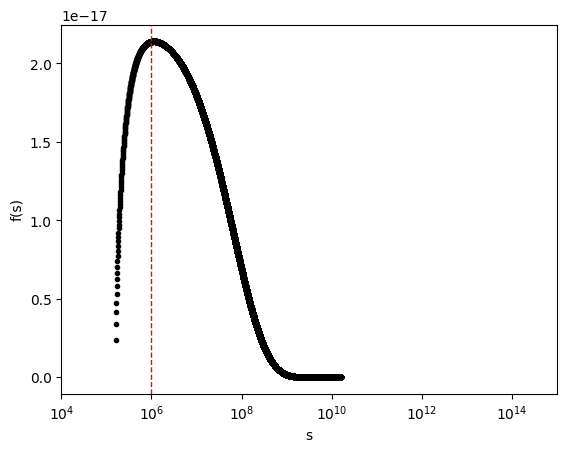

In [8]:
plt.figure()
plt.plot(x,y,'k.')
plt.xscale('log')
plt.xlabel('s')
plt.ylabel('f(s)')
plt.xlim(int(1e4),int(1e15))
plt.axvline(int(1e6), color="red", linewidth=1, linestyle="dashed")
plt.show()

In [16]:
class Integrador:
  def __init__(self,f_,N_,inter):
    self.f = f_
    self.N = N_
    self.a = inter[0]
    self.b = inter[1]
    self.datos = (self.b - self.a) * np.random.random_sample((self.N)) + self.a
    #print(self.datos)
    self.F = f_(self.datos)
    self.E = 0
    self.var = 0
    self.div = self.b - self.a

  def integral(self):
    self.E = self.div*np.sum(self.F) / self.N
    return self.E

  def varianza(self):
    elementos = self.F**2
    self.var = (self.div**2)*((np.sum(elementos)/self.N) - self.E**2)
    return self.var

  def __str__(self):
    texto = r"El valor de la integral es " + str(self.integral()) + " y su error es: " + str(np.sqrt(abs(self.varianza())))
    return texto

In [17]:
Resultado=Integrador(val.funcion_int,1000000,list)

print(Resultado)

a=Resultado.integral()
Conv=(5.1e13)**3 /(1.5e24)

Fact=1/Conv

print("Cross section en cm^3/s = ", a*Fact)






El valor de la integral es 2.4546587371740008e-09 y su error es: 3.9270612340804534
Cross section en cm^3/s =  2.7756957020761255e-26


In [74]:
b=10
a=5
print((b - a) * np.random.random_sample(20) + a )

[8.49183374 7.4442586  6.71597738 7.31516766 8.51114446 6.69376861
 9.82558481 9.38987035 7.57846553 6.9086489  9.18816481 9.22240574
 9.77989694 8.83870135 7.70994334 5.42197015 6.97405083 6.20230953
 9.29204967 9.66978884]


In [114]:
Conv=(5.1e13)**3 /(1.5e25)

print(1/Conv)

1.1307868014564534e-16
